<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

### **TAREA: Feed Forward Neural Network**

*16 de Noviembre de 2024*

**Nombre Estudiante(s)**: Cristian Tobar - Victor Saldivia - Joaquin Leiva - Constanza Perez

### **1. Introducción**

En esta tarea, aplicaremos una red neuronal feedforward al conjunto de datos *"Heart Failure Clinical Records"* para predecir eventos de muerte en pacientes. Este enfoque nos permitirá capturar relaciones complejas entre las variables clínicas y mejorar la precisión predictiva en comparación con modelos más simples.

### **2. Objetivo**

- Construir un modelo basado en redes neuronales feedforward para la predicción de eventos adversos en pacientes con insuficiencia cardíaca.
- Optimizar y evaluar el modelo mediante métricas de rendimiento relevantes, como la precisión y la matriz de confusión.

### **3. Metodología**

El proyecto está dividido en cuatro etapas principales:

1. Preparación del Conjunto de Datos
   - Descarga y limpieza del conjunto de datos.
   - Escalado de características y división en conjuntos de entrenamiento y prueba.

2. Diseño de la Arquitectura de la Red Neuronal
   - Selección del número de capas, neuronas y funciones de activación.
   - Compilación del modelo con un optimizador y función de pérdida adecuados.

3. Entrenamiento de la Red Neuronal
   - Configuración de parámetros de entrenamiento, como el número de ciclos de entrenamiento y el tamaño del lote.
   - Monitoreo de métricas durante el entrenamiento (pérdida y precisión).

4. Evaluación del Modelo
   - Validación en el conjunto de prueba.
   - Visualización del rendimiento (precisión, pérdida) y análisis de la matriz de confusión

#### **Preparación del Conjunto de Datos**

Para garantizar un rendimiento óptimo del modelo, es esencial preprocesar y normalizar los datos. Esto incluye la separación de las características y la variable objetivo, la normalización de las características y la división de los datos en conjuntos de entrenamiento y prueba.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from keras import models, layers, optimizers, regularizers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



In [3]:
# Fetch Dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Separación de características y objetivo
X_features = heart_failure_clinical_records.data.features
y_targets = heart_failure_clinical_records.data.targets

In [4]:
# Concatena características y objetivo en un DataFrame
new_df = pd.concat([X_features, y_targets], axis=1)
new_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
print(new_df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


#### **Escalado y División de Datos**

In [6]:
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### **Ajuste del desbalanceo** 
Se realiza un desbalanceo de los datos con la finalidad de mejorar la capacidad del modelo para generalizar y dar predicciones precisas.  
- **Sobremuestreo de la clase minoritaria (Oversampling)**  
consiste en incrementar el número de muestras en la clase minoritaria duplicando algunas de ellas. Se utiliza la técnica SMOTE


In [7]:
from imblearn.over_sampling import SMOTE
# Crear el objeto SMOTE 
smote = SMOTE(random_state=42)

# Aplicar SMOTE a los conjuntos de entrenamiento 
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### **Diseño de la Arquitectura de la RNA**

Diseñaremos una red neuronal con una capa oculta que aprenderá características útiles de los datos, seguida de una capa de salida que realizará la clasificación. Utilizaremos técnicas avanzadas como la regularización y el ajuste de hiperparámetros para mejorar el rendimiento del modelo.

#### **Construcción del Modelo**

Parámetros de entrenamiento del modelo de aprendizaje. 
- `hidden_units:` Cantidad de neuronas en la capa oculta.
- `activation:` Función de activación **relu**, , dicha función se utiliza porque introduce no linelidad y es computacionalmente eficiente. 
- `l2:` Regularización L2, también conocida como decaimiento de pesos, penaliza grandes valores en los parámetros del modelo. 
- `learning_rate:` Tasa de apredizaje, define cuan grande son los pasos que da el algoritmo de optimización.
- `epochs:` Iteración completa sobre todo el conjunto de datos de entrenamiento.
- `batch_size:` Tamaño del lote, se define cuántas muestras se utilizan para actualizar los parámetros del modelo en cada paso de optimización. 

In [41]:
hidden_units = 15     
activation = 'relu'   
l2 = 0.01                              
learning_rate = 0.01  
epochs = 7            
batch_size = 16    

Creación del modelo, añadir las capas ocultas y la capa de salida.

In [42]:
# Creación del modelo
model = models.Sequential()

#Extrayendo el número de las columnas
features = X_train_res.shape[1]

# Primera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=features, #Espicifica la dimensión de entrada, "Número de características"
                       units=hidden_units, # Número de neuronas
                       activation=activation)) # Función de activación

# segunda capa oculta de 10 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units, 
                       activation=activation))

# tercera capa oculta
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

# final de la red, outputs
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))# Común en problema de clasificación binaria


# Definción de la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', # ideal para problemas de clasificación binaria
              # Adam es un método de descenso de gradiente adaptativo
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy']) # Para medir la precisión del modelo


# Resumen del modelo
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 15)                195       
                                                                 
 dense_33 (Dense)            (None, 15)                240       
                                                                 
 dense_34 (Dense)            (None, 15)                240       
                                                                 
 dense_35 (Dense)            (None, 1)                 16        
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


**Justificación:** 

La elección de tres capas ocultas para el análisis a trabajar, con la finalidad de capturar más características sin incurrir en un sobreajuste severo. 

Para la función de activación para la capa de salida, se utiliza `sigmoid`, debido a que es útil para problemas de clasificación, convierte la salida a un valor entre 0 y 1, lo cual es ideal para problema donde se necesita predecir una probabilidad o una clase binaria.    

No se utilizó **relu** porque típicamente no es útil en la capa de salida. Es una función lineal a trozos que introduce no linealidad en las capas ocultas, pero no limita la salida entre 0 y 1, lo cual es necesario para tareas de clasificación. 

- `units: 1`, si el paciente fallece en el periodo de seguimiento. 

### **Evalución del modelo**

- `epochs:` Número de épocas, cuantas veces el modelo verá el conjunto completo de datos de entrenamiento.
- `Evalución de la precisión:`  
La evaluación del modelo, se evalúa tanto en los datos de entrenamiento como en los de prueba.  

In [43]:
# Entrenamiento del modelo
history = model.fit(X_train_res, y_train_res, epochs=10, batch_size=batch_size, validation_split=0.2, 
                    verbose=1)

# Evalución de la precisión
train_acc = model.evaluate(X_train_res, y_train_res, batch_size=batch_size)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)[1]
print('Training accuracy: %.4f' % train_acc)
print('Testing accuracy: %.4f' % test_acc)

Epoch 1/10
17/17 [==============================] - 1s 16ms/step - loss: 0.6212 - accuracy: 0.6679 - val_loss: 0.9335 - val_accuracy: 0.2941
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.7985 - val_loss: 0.5021 - val_accuracy: 0.7647
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.8657 - val_loss: 0.5444 - val_accuracy: 0.7353
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.8657 - val_loss: 0.2391 - val_accuracy: 0.9559
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.8955 - val_loss: 0.2970 - val_accuracy: 0.8971
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9030 - val_loss: 0.2089 - val_accuracy: 0.9559
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.9291 - val_loss: 0.1676 - val_accuracy: 0.9559
Epoch 8/10
17/17 [=

### **Detener el modelo**
- `Early Stopping:` Para detener el entrenamiento cuando el modelo deje de mejorar en el conjunto de validación.

In [34]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train_res, y_train_res, 
                    epochs=10, 
                    batch_size=batch_size, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
17/17 [==============================] - 0s 6ms/step - loss: 0.1630 - accuracy: 0.9254 - val_loss: 0.1670 - val_accuracy: 0.9559
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.1597 - accuracy: 0.9366 - val_loss: 0.1913 - val_accuracy: 0.9706
Epoch 3/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9440 - val_loss: 0.1578 - val_accuracy: 0.9706
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9590 - val_loss: 0.1181 - val_accuracy: 0.9706
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9701 - val_loss: 0.1008 - val_accuracy: 0.9706
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9739 - val_loss: 0.0967 - val_accuracy: 0.9559
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0756 - accuracy: 0.9664 - val_loss: 0.0937 - val_accuracy: 1.0000
Epoch 8/10
17/17 [==

### **Visualización del Rendimiento**

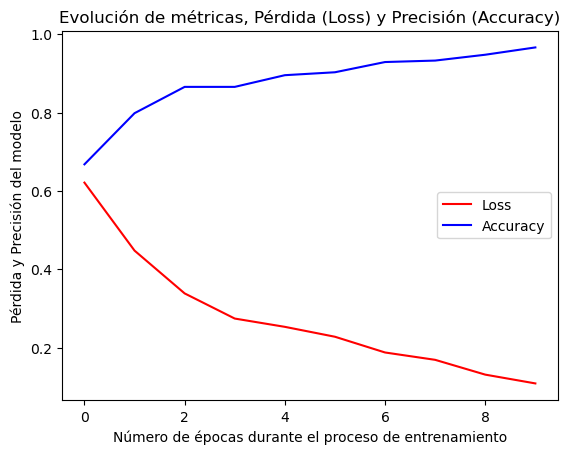

In [44]:
losses = history.history['loss']
accuracy = history.history['accuracy']
plt.figure()

plt.plot(range(len(losses)), losses, 'r', label='Loss')
plt.plot(range(len(accuracy)), accuracy, 'b', label='Accuracy')
plt.xlabel('Número de épocas durante el proceso de entrenamiento')
plt.ylabel('Pérdida y Precisión del modelo')
plt.title('Evolución de métricas, Pérdida (Loss) y Precisión (Accuracy)')
plt.legend(loc="center right")
plt.show()

### **Evaluación del Modelo con Matriz de Confusión**

2/2 [==============================] - 0s 8ms/step


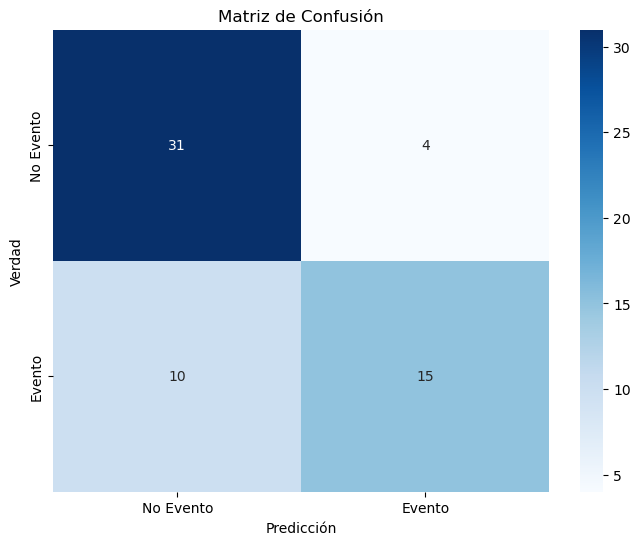


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



In [45]:
# Predicción
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdad')
plt.xlabel('Predicción')
plt.show()

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))
